In [2]:
#use rejex
import re
import matplotlib.pyplot as plt


In [3]:
def modify_file(file_name):
    with open(file_name, "r") as file:
        content = file.read()

    pattern = r'(\[\d+(, \d+)*\]) =  Sure! Here is the sorted list:\n\n(\[\d+(, \d+)*\])'
    repl = r'\1 = Sure! Here is the sorted list: \3'
    new_content = re.sub(pattern, repl, content, flags=re.DOTALL)
    
    #pattern = [525, 820, 767, 695, 163] =  Sure! Here is the sorted list of numbers in ascending order:

    #[163, 695, 767, 820, 525] 
    pattern = r'(\[\d+(, \d+)*\]) =  Sure! Here is the sorted list of numbers in ascending order:\n\n(\[\d+(, \d+)*\])'
    repl = r'\1 = Sure! Here is the sorted list: \3'
    new_content = re.sub(pattern, repl, new_content, flags=re.DOTALL)
    
    #[495, 475, 208, 348, 621] =  Sure! Here is the sorted list in ascending order:

    #[208, 348, 475, 495, 621] 
    
    pattern = r'(\[\d+(, \d+)*\]) =  Sure! Here is the sorted list in ascending order:\n\n(\[\d+(, \d+)*\])'
    repl = r'\1 = Sure! Here is the sorted list: \3'
    new_content = re.sub(pattern, repl, new_content, flags=re.DOTALL)
    
    

    new_file_name = file_name.replace(".txt", "_new.txt")
    with open(new_file_name, "w") as new_file:
        new_file.write(new_content)

    

In [4]:
modify_file("sort_output_5_pos.txt")

In [5]:
def generate_true_predicted(file_name):
    file=open(file_name,"r")

    true_sort=[]
    predicted_sort=[]
    count = 0
    for line in file:
        line = line.strip()
        #print(line)
        
        if line:
            #[-6, 0, 0, -1, 3] =  The sorted list is [-1, -6, 0, 0, 3]. 
            #find 2 patterns of list in a line
            #find all list in a line
            #pattern = r'\[([0-9, ]+)\]'
            #pattern can have positive and negative numbers
            pattern = r'\[(-?\d+(?:, -?\d+)*)\]'
            
            lists = re.findall(pattern, line)
            
            #first is problem list sort it in ascending order
            
            problem_list = lists[0]
            problem_list = [int(x) for x in problem_list.split(", ")]
            problem_list.sort()
            true_sort.append(problem_list)
            
            #second is predicted list 
            
            predicted_list = lists[1]
            predicted_list = [int(x) for x in predicted_list.split(", ")]
            predicted_sort.append(predicted_list)
            count += 1
            
    print('total lines:', count)
    file.close()
    return true_sort, predicted_sort


In [6]:
true_sort_5_pos, predicted_sort_5_pos = generate_true_predicted("sort_output_5_pos_new.txt")
print('done')
true_sort_5_neg, predicted_sort_5_neg = generate_true_predicted("sort_output_5_neg.txt")
print('done')
true_sort_3_pos, predicted_sort_3_pos = generate_true_predicted("sort_output_3_pos.txt")
print('done')
true_sort_3_neg, predicted_sort_3_neg = generate_true_predicted("sort_output_3_neg_1.txt")
print('done')

total lines: 500
done
total lines: 500
done
total lines: 500
done
total lines: 500
done


#### Hard accuracy

In [7]:
#total 500 examples 100 for each digit total 5 digits numbers

def calculate_hard_accuracy (true, predicted):
    
    digit_wise_accuracy = {str(i): 0 for i in range(1,6)}
    
    for i in range(0, len(true)):
        
        if i < 100:
            digit_wise_accuracy["1"] += 1 if true[i] == predicted[i] else 0
        elif i < 200:
            digit_wise_accuracy["2"] += 1 if true[i] == predicted[i] else 0
        elif i < 300:
            digit_wise_accuracy["3"] += 1 if true[i] == predicted[i] else 0
        elif i < 400:
            digit_wise_accuracy["4"] += 1 if true[i] == predicted[i] else 0
        else:
            digit_wise_accuracy["5"] += 1 if true[i] == predicted[i] else 0
            
    return digit_wise_accuracy
    

In [8]:
#calculate accuracy for each digit
digit_wise_accuracy_5_pos = calculate_hard_accuracy(true_sort_5_pos, predicted_sort_5_pos)
digit_wise_accuracy_5_neg = calculate_hard_accuracy(true_sort_5_neg, predicted_sort_5_neg)
digit_wise_accuracy_3_pos = calculate_hard_accuracy(true_sort_3_pos, predicted_sort_3_pos)
digit_wise_accuracy_3_neg = calculate_hard_accuracy(true_sort_3_neg, predicted_sort_3_neg)

print(digit_wise_accuracy_5_pos)
print(digit_wise_accuracy_5_neg)
print(digit_wise_accuracy_3_pos)
print(digit_wise_accuracy_3_neg)


{'1': 66, '2': 56, '3': 52, '4': 50, '5': 44}
{'1': 29, '2': 26, '3': 24, '4': 18, '5': 18}
{'1': 90, '2': 74, '3': 73, '4': 55, '5': 55}
{'1': 65, '2': 49, '3': 44, '4': 50, '5': 40}


#### Finding longest common subsequence

In [9]:
def lcs(X, Y):
    m = len(X)
    n = len(Y)
    L = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i - 1] == Y[j - 1]:
                L[i][j] = L[i - 1][j - 1] + 1
            else:
                L[i][j] = max(L[i - 1][j], L[i][j - 1])
    return L[m][n]

def soft_accuracy(true, predicted):
    lcs_length = lcs(true, predicted)
    return lcs_length / len(true)


true = [1, 2, 3, 4, 5, 6]
predicted = [6, 1, 2, 3, 5]
accuracy = soft_accuracy(true, predicted)
print(accuracy)  # Output: 0.666

0.6666666666666666


In [10]:
#calculate soft accuracy for each digit

def calculate_soft_accuracy(true, predicted):
    digit_wise_accuracy = {str(i): 0 for i in range(1,6)}
    
    for i in range(0, len(true)):
        
        if i < 100:
            digit_wise_accuracy["1"] += soft_accuracy(true[i], predicted[i])
        elif i < 200:
            digit_wise_accuracy["2"] += soft_accuracy(true[i], predicted[i])
        elif i < 300:
            digit_wise_accuracy["3"] += soft_accuracy(true[i], predicted[i])
        elif i < 400:
            digit_wise_accuracy["4"] += soft_accuracy(true[i], predicted[i])
        else:
            digit_wise_accuracy["5"] += soft_accuracy(true[i], predicted[i])
            
    return digit_wise_accuracy


In [11]:
#calculate accuracy for each digit
digit_wise_soft_accuracy_5_pos = calculate_soft_accuracy(true_sort_5_pos, predicted_sort_5_pos)
digit_wise_soft_accuracy_5_neg = calculate_soft_accuracy(true_sort_5_neg, predicted_sort_5_neg)
digit_wise_soft_accuracy_3_pos = calculate_soft_accuracy(true_sort_3_pos, predicted_sort_3_pos)
digit_wise_soft_accuracy_3_neg = calculate_soft_accuracy(true_sort_3_neg, predicted_sort_3_neg)

print(digit_wise_soft_accuracy_5_pos)
print(digit_wise_soft_accuracy_5_neg)
print(digit_wise_soft_accuracy_3_pos)
print(digit_wise_soft_accuracy_3_neg)



{'1': 95.99999999999996, '2': 91.99999999999993, '3': 89.19999999999993, '4': 88.19999999999993, '5': 86.59999999999992}
{'1': 80.99999999999991, '2': 79.19999999999989, '3': 77.59999999999994, '4': 72.99999999999994, '5': 74.59999999999992}
{'1': 98.0, '2': 91.33333333333334, '3': 91.00000000000003, '4': 84.33333333333336, '5': 85.00000000000001}
{'1': 89.00000000000001, '2': 79.0, '3': 78.0, '4': 80.00000000000003, '5': 73.33333333333334}


### Plots

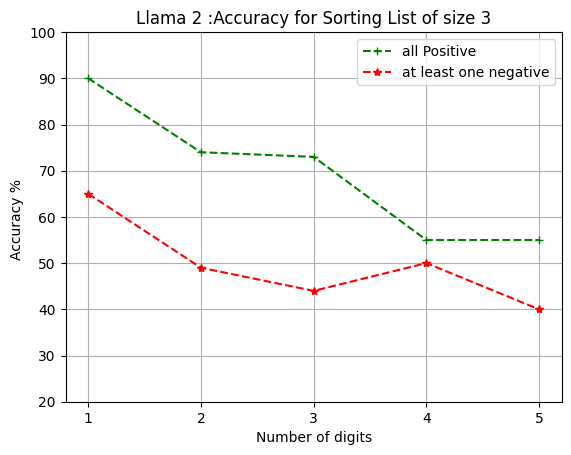

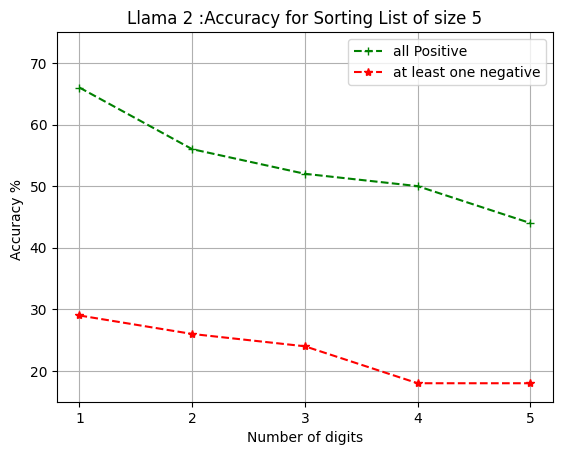

In [12]:
#for list of size 3
plt.plot(list(digit_wise_accuracy_3_pos.keys()), list(digit_wise_accuracy_3_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.plot(list(digit_wise_accuracy_3_neg.keys()), list(digit_wise_accuracy_3_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.ylim(20, 100)
plt.title("Llama 2 :Accuracy for Sorting List of size 3")
plt.show()

#for list of size 5
plt.plot(list(digit_wise_accuracy_5_pos.keys()), list(digit_wise_accuracy_5_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.plot(list(digit_wise_accuracy_5_neg.keys()), list(digit_wise_accuracy_5_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.ylim(15, 75)
plt.title("Llama 2 :Accuracy for Sorting List of size 5")
plt.show()


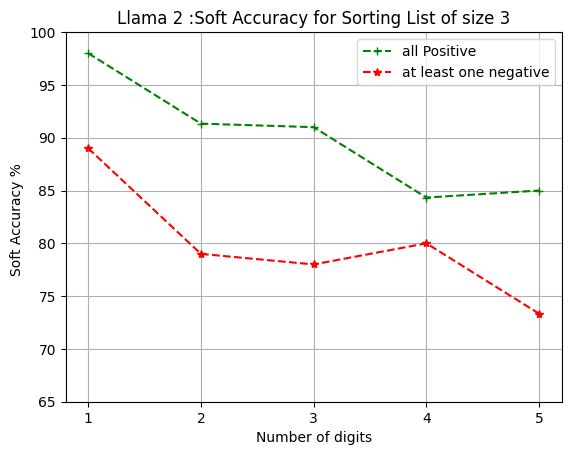

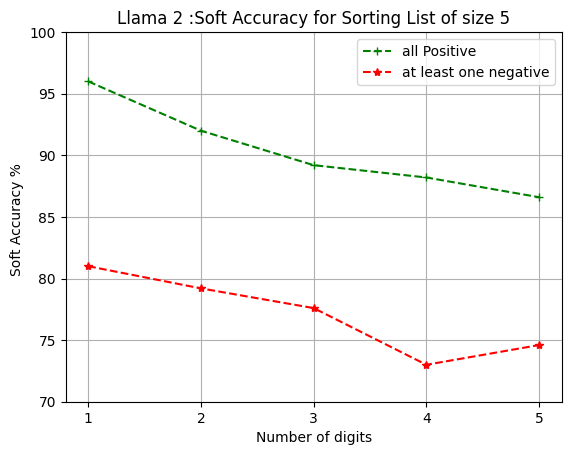

In [15]:
#soft accuracy for list of size 3
plt.plot(list(digit_wise_soft_accuracy_3_pos.keys()), list(digit_wise_soft_accuracy_3_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.plot(list(digit_wise_soft_accuracy_3_neg.keys()), list(digit_wise_soft_accuracy_3_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Soft Accuracy % ")
plt.legend()
plt.grid()
plt.ylim(65, 100)
plt.title("Llama 2 :Soft Accuracy for Sorting List of size 3")
plt.show()


#soft accuracy for list of size 5
plt.plot(list(digit_wise_soft_accuracy_5_pos.keys()), list(digit_wise_soft_accuracy_5_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.plot(list(digit_wise_soft_accuracy_5_neg.keys()), list(digit_wise_soft_accuracy_5_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Soft Accuracy % ")
plt.legend()
plt.grid()
plt.ylim(70, 100)
plt.title("Llama 2 :Soft Accuracy for Sorting List of size 5")
plt.show()